<a href="https://colab.research.google.com/github/GVilok/ml/blob/main/labsheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

labsheet5


Saving student_embeddings.xlsx to student_embeddings (6).xlsx
Predicted Values for All Data Points:
[0.12791054 0.09063757 0.06619114 0.11258916 0.07886882 0.05441063
 0.07657647 0.08890617 0.06491831 0.0974442  0.04296684 0.08680378
 0.1147053  0.10307108 0.07420653 0.11177813 0.07323167 0.10867047
 0.0889517  0.12966094 0.05460411 0.14958287 0.13784995 0.11847668
 0.08323848 0.09926166 0.08972947 0.08425578]
Train Metrics: MSE=0.012, RMSE=0.110, R²=0.052
Multi-Feature Train Metrics: MSE=0.000, RMSE=0.000, R²=1.000
Cluster Labels: [0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Cluster Centers:
 [[ 0.21194652  0.14299861  0.09163467 ...  0.08989785  0.10886762
   0.19530195]
 [ 0.27123067 -0.05621034  0.12470851 ...  0.06656228  0.08977373
   0.1947194 ]]
Silhouette Score: 0.093, CH Score: 3.568, DB Index: 2.211


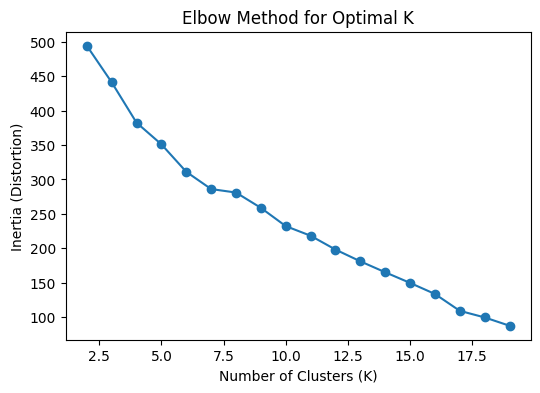

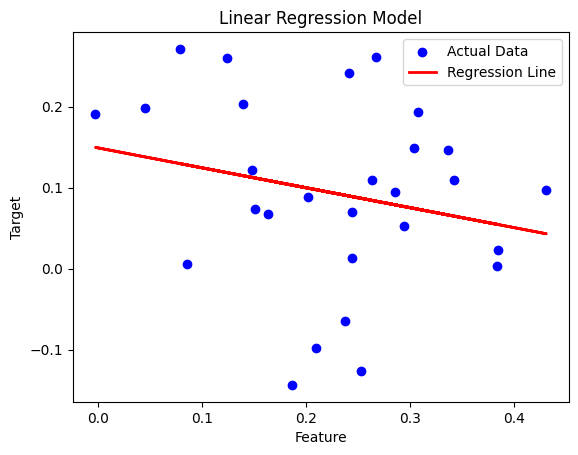

In [7]:
# ✅ Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from google.colab import files

# Upload the file in Google Colab
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# A1: Train Linear Regression Model
X_train = df.iloc[:, [1]]
y_train = df.iloc[:, 2]
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("Predicted Values for All Data Points:")
print(y_train_pred)

# A2: Evaluate Model Performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y, y_pred)
    return mse, rmse, r2

train_metrics = evaluate_model(model, X_train, y_train)
print(f"Train Metrics: MSE={train_metrics[0]:.3f}, RMSE={train_metrics[1]:.3f}, R²={train_metrics[2]:.3f}")

# A3: Train on Multiple Features
X_multi = df.iloc[:, 1:-1]
y_multi = df.iloc[:, -1]
model_multi = LinearRegression().fit(X_multi, y_multi)
multi_metrics = evaluate_model(model_multi, X_multi, y_multi)
print(f"Multi-Feature Train Metrics: MSE={multi_metrics[0]:.3f}, RMSE={multi_metrics[1]:.3f}, R²={multi_metrics[2]:.3f}")

# A4: Perform K-Means Clustering
X_cluster = df.iloc[:, 1:-1]
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_cluster)
print("Cluster Labels:", kmeans.labels_)
print("Cluster Centers:\n", kmeans.cluster_centers_)

# A5: Compute Clustering Metrics
silhouette = silhouette_score(X_cluster, kmeans.labels_)
ch_score = calinski_harabasz_score(X_cluster, kmeans.labels_)
db_index = davies_bouldin_score(X_cluster, kmeans.labels_)
print(f"Silhouette Score: {silhouette:.3f}, CH Score: {ch_score:.3f}, DB Index: {db_index:.3f}")

# A6: Evaluate K-Means for Different K Values
distortions = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_cluster)
    distortions.append(kmeans.inertia_)

# A7: Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, distortions, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Scatter plot for visualization
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Model")
plt.legend()
plt.show()
